# TASK 1 

# Project 1

# NAME : Pankaj Kumar Barman

# Project name : Employees Salary prediction based on their past Experience

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data set
data = pd.read_csv("Salary_Data.csv")

In [3]:
df = data.copy()

In [4]:
# Data Characteristics
def data_characteristics(dataset):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(dataset.shape))
    print("Number of Columns in the Dataset : {}".format(dataset.shape[1]))
    print("Number of Rows in the Dataset : {}".format(dataset.shape[0]))
    print("->"*50)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = dataset.select_dtypes(include = [np.number])
    categoric_features = dataset.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("->"*50)
    
    # Unique values
    print("No of unique values : {}".format(dataset.nunique()))
    print("->"*50)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(dataset.count()))
    print("->"*50)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(dataset.info(verbose = False, memory_usage = "deep")))
    print("->"*50)
    
#------------------------------------------------------------------------------>


print(data_characteristics(df))  # sending the dataset



Shape of the Dataset : (30, 2)
Number of Columns in the Dataset : 2
Number of Rows in the Dataset : 30
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Number of Numerical Features : 2
Number of Categorical Features : 0
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
No of unique values : YearsExperience    28
Salary             30
dtype: int64
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
No of NON-NANS : YearsExperience    30
Salary             30
dtype: int64
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 2 entries, YearsExperience to Salary
dtypes: float64(2)
memory usage: 608.0 bytes
Information of the Dataset : None
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->-

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df2 = df.copy()

In [9]:
df.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

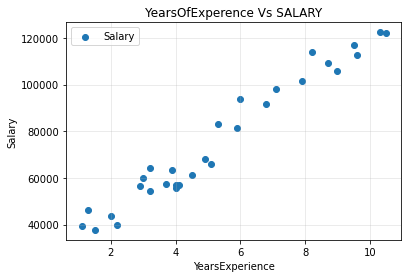

In [10]:
plt.scatter(x='YearsExperience',y='Salary' ,data=df)
plt.xlabel('YearsExperience')
plt.ylabel("Salary")
plt.title('YearsOfExperence Vs SALARY')
plt.legend()
plt.grid(alpha=0.3)

# Importing Liniar_regression model and perform train test split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
#SPLITTING DATA INTO TRAIN & TEST SETS

X=df.iloc[:,:-1] # independed features 
y=df.iloc[:,1]   # dependent festurs
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [14]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [15]:
X_train.head()

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9


In [16]:
X_test.head()

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5


In [17]:
y_train.head()

27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
Name: Salary, dtype: float64

In [18]:
y_test.tail()

28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

In [19]:
#SHAPE OF TRAINING DATA SET ----->
print(X_train.shape)
print(y_train.shape)

(24, 1)
(24,)


In [20]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

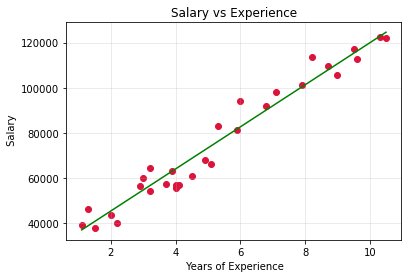

In [21]:
regline=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y,COLOR='crimson')
plt.plot(X,regline, color='green')
plt.title("Salary vs Experience")
plt.xlabel(" Years of Experience")
plt.ylabel(" Salary")
plt.grid(alpha=0.3)

In [22]:
y_pred=regressor.predict(X_test)

In [23]:
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [24]:
# ACTUAL Vs PREDICTED
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


# visualizing the training set result

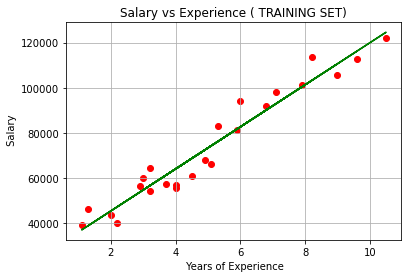

In [25]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'green')
plt.title("Salary vs Experience ( TRAINING SET)")
plt.xlabel(" Years of Experience")
plt.ylabel(" Salary")
plt.grid()
plt.show()

# Visualizing the test set result

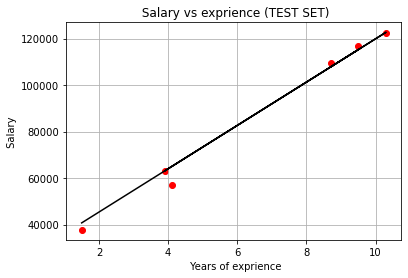

In [26]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,regressor.predict(X_test),color = 'black')
plt.title(" Salary vs exprience (TEST SET)")
plt.xlabel(" Years of exprience")
plt.ylabel( " Salary ")
plt.grid()
plt.show()

# What will be the slary if a person has 9.7 years of experence ?

In [27]:
years=9.25
salary_pred=regressor.predict([[years]])
print("Number of years of experence {} ".format(years))
print("predicted salary = {} ".format(salary_pred[0])) # salary in rupee

Number of years of experence 9.25 
predicted salary = 112921.41907287316 


# Conclusion : if a person has 9.7 years of experience his predicted salary would be 112921.41907287316 rupee

# What will be the slary if a person has 1.5 years of experence ?

In [28]:
years=1.5
salary_pred=regressor.predict([[years]])
print("Number of years of experence {} ".format(years))
print("predicted salary = {}".format(salary_pred[0]))

Number of years of experence 1.5 
predicted salary = 40748.96184072197


# Conclusion : if a person has 1.5 years of experience his predicted salary would be 40748.96184072197 rupee